<a href="https://colab.research.google.com/github/INFINITY-RUBER/Curso_Deep_Learning_Con_TernsorFlow_Machine-Learning_e_IA-/blob/master/scripts/tema08/02-tf-idf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#pip install tensorflow==1.14

# Text Frecuency - Inverse Document Frequency

- $w_{tf}$: frecuencia de aparición de una palabra en un documento
- $w_{df}$: frecuencia total de aparición de una palabra en el conjunto de todos los documentos (corpus)

$$w_{tf-idf} = w_{tf}\cdot \log\left(\frac{1}{w_{df}}\right)$$

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import csv
import numpy as np
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import os
from zipfile import ZipFile
import requests
import io

In [0]:
session = tf.Session()
batch_size = 200 # numero de textos
max_features = 1000 # conjunto de palabras

In [0]:

save_file_name = os.path.join('sample_data','spam_data.csv')
#save_file_name = os.path.join('..','..','datasets', 'spam_data.csv')
if os.path.isfile(save_file_name):
    #el fichero existe y solo hay que cargarlo
    text_data = []
    with open(save_file_name, 'r') as temp_output_file:
        reader = csv.reader(temp_output_file)
        for row in reader:
            text_data.append(row)
else: 
    ##el fichero no existe y debemos descargarlo
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
    req = requests.get(url)
    z = ZipFile(io.BytesIO(req.content))
    file = z.read('SMSSpamCollection')
    ##Transformar el fichero binario a texto
    text_data = file.decode()
    text_data = text_data.encode('ascii', errors='ignore')
    text_data = text_data.decode().split('\n')
    text_data = [x.split('\t') for x in text_data if len(x)>=1]
    ##Guardar datos en CSV
    with open(save_file_name, 'w') as temp_output_file:
        writer = csv.writer(temp_output_file)
        writer.writerows(text_data)

In [0]:
import os
save_file_name = os.path.join('sample_data','spam_data.csv')

text_data = []
with open(save_file_name, 'r') as temp_output_file:
    reader = csv.reader(temp_output_file)
    for row in reader:
        text_data.append(row)

In [0]:
texts = [x[1] for x in text_data]
target = [x[0] for x in text_data]
target = [1 if x == 'spam' else 0 for x in target]

In [0]:
texts = [x.lower() for x in texts] # Convertir los textos a minúscula
texts = [''.join(c for c in x if c not in string.punctuation) for x in texts] # Eliminamos signos de puntuación
texts = [''.join(c for c in x if c not in '0123456789') for x in texts] # Eliminamos los números
texts = [' '.join(x.split()) for x in texts] # Eliminar espacios en blanco y separadores extras

In [0]:
def tokenizer(text):
    words = nltk.word_tokenize(text)# rompe el texto a plabras
    return words

In [0]:
tfidf = TfidfVectorizer(tokenizer=tokenizer, stop_words='english', max_features=max_features)

In [58]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
sparse_tfidf_texts = tfidf.fit_transform(texts)
#  se crea una matrix sparce de 5574x1000 sparse matrix 

In [60]:
sparse_tfidf_texts

<5574x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 30012 stored elements in Compressed Sparse Row format>

In [61]:
len(texts)

5574

La matriz sparsed después de ser tokenizada, contiene 
- tantas filas como la longitud de: `len(texts)`
- tantas columnas como palabras importantes hemos extraido del proceso de tokenización (las `max_features` importantes)
- es una matriz sparsed, donde en fila i, columna j contiene la frecuencia de aparición de la palabra i en el texto j, que hemos llamado $w_{tf-idf}$ (probablemente cero en la mayoría de casos)

In [62]:
sparse_tfidf_texts.shape

(5574, 1000)

In [63]:
print(type(sparse_tfidf_texts))
print((sparse_tfidf_texts[0:1]))

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 922)	0.2709848154866997
  (0, 323)	0.22032541100275282
  (0, 227)	0.28102915589024796
  (0, 421)	0.3896274380321477
  (0, 967)	0.3277447602873963
  (0, 326)	0.2645280991765623
  (0, 545)	0.2561101665717327
  (0, 38)	0.3613966215413548
  (0, 160)	0.36805562944957004
  (0, 630)	0.37172623140154337


In [64]:
matrix = pd.DataFrame(sparse_tfidf_texts.todense())
matrix.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.361397,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.327745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.258736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# dividimos los datos para entrenar:
train_idx = np.random.choice(sparse_tfidf_texts.shape[0], round(0.8*sparse_tfidf_texts.shape[0]), replace=False)
test_idx = np.array(list(set(range(sparse_tfidf_texts.shape[0]))-set(train_idx)))

In [0]:
texts_train = sparse_tfidf_texts[train_idx]
texts_test = sparse_tfidf_texts[test_idx]
target_train = np.array([x for ix, x in enumerate(target) if ix in train_idx])
target_test = np.array([x for ix, x in enumerate(target) if ix in test_idx])

In [0]:
A = tf.Variable(tf.random_normal(shape = [max_features, 1]))
b = tf.Variable(tf.random_normal(shape = [1,1]))
x_data = tf.placeholder(shape = [None, max_features], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)

In [0]:
# NUESTO MODEL SERA LINEAL
model_output = tf.add(tf.matmul(x_data, A), b)
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model_output, labels=y_target))

In [0]:
prediction = tf.round(tf.sigmoid(model_output))
predictions_correct = tf.cast(tf.equal(prediction, y_target), tf.float32)
accuracy = tf.reduce_mean(predictions_correct)

In [0]:
# mi obtimizador el gradiante desendente
my_optim = tf.train.GradientDescentOptimizer(0.0025)
train_step = my_optim.minimize(loss)
init = tf.global_variables_initializer()
session.run(init)

In [74]:
#proceso de entrenamiento:
train_loss = []
test_loss = []
train_acc = []
test_acc = []
i_data = []

for i in range(10000):
    rand_idx = np.random.choice(texts_train.shape[0], size = batch_size)
    rand_x = texts_train[rand_idx].todense()# .todense() los coloca en la forma correcta
    rand_y = np.transpose([target_train[rand_idx]])
    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    if(i+1)%100==0:
        i_data.append(i+1)
        
        train_loss_temp = session.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
        train_loss.append(train_loss_temp)
        
        test_loss_temp = session.run(loss, feed_dict={x_data:texts_test.todense(), 
                                                      y_target:np.transpose([target_test])})
        test_loss.append(test_loss_temp)
        
        train_acc_temp = session.run(accuracy, feed_dict={x_data: rand_x, y_target: rand_y})
        train_acc.append(train_acc_temp)
        
        test_acc_temp = session.run(accuracy, feed_dict={x_data: texts_test.todense(), 
                                                         y_target: np.transpose([target_test])})
        test_acc.append(test_acc_temp)
        
    if(i+1)%500==0:
        acc_and_loss = [i+1, train_loss_temp, test_loss_temp, train_acc_temp, test_acc_temp]
        acc_and_loss = [np.round(x,3) for x in acc_and_loss]
        print("Paso #{}. Train loss: {}. Test Loss: {}.\n  Train Acc: {}. Test Acc:{}.".format(*acc_and_loss))

Paso #500. Train loss: 1.409999966621399. Test Loss: 1.4980000257492065.
  Train Acc: 0.1899999976158142. Test Acc:0.17599999904632568.
Paso #1000. Train loss: 1.0750000476837158. Test Loss: 1.0789999961853027.
  Train Acc: 0.30000001192092896. Test Acc:0.3019999861717224.
Paso #1500. Train loss: 0.8659999966621399. Test Loss: 0.8209999799728394.
  Train Acc: 0.4300000071525574. Test Acc:0.4740000069141388.
Paso #2000. Train loss: 0.7360000014305115. Test Loss: 0.6669999957084656.
  Train Acc: 0.6000000238418579. Test Acc:0.6209999918937683.
Paso #2500. Train loss: 0.5419999957084656. Test Loss: 0.5759999752044678.
  Train Acc: 0.7400000095367432. Test Acc:0.6940000057220459.
Paso #3000. Train loss: 0.5210000276565552. Test Loss: 0.5189999938011169.
  Train Acc: 0.7599999904632568. Test Acc:0.746999979019165.
Paso #3500. Train loss: 0.5199999809265137. Test Loss: 0.4830000102519989.
  Train Acc: 0.7900000214576721. Test Acc:0.7960000038146973.
Paso #4000. Train loss: 0.5540000200271606

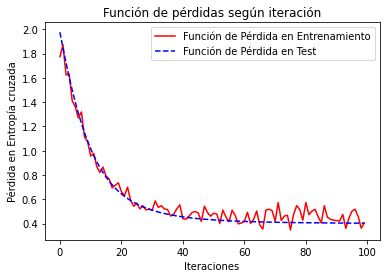

In [75]:
plt.plot(train_loss, 'r-', label = "Función de Pérdida en Entrenamiento")
plt.plot(test_loss, 'b--', label = "Función de Pérdida en Test")
plt.legend(loc="upper right")
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida en Entropía cruzada")
plt.title("Función de pérdidas según iteración")
plt.show()

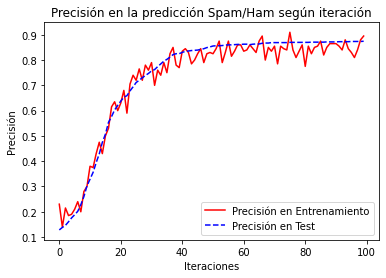

In [76]:
plt.plot(train_acc, 'r-', label = "Precisión en Entrenamiento")
plt.plot(test_acc, 'b--', label = "Precisión en Test")
plt.legend(loc="lower right")
plt.xlabel("Iteraciones")
plt.ylabel("Precisión")
plt.title("Precisión en la predicción Spam/Ham según iteración")
plt.show()